# **Covid Detection**

# **3-2 Dataset**

In [100]:
from IPython.display import clear_output
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, recall_score, accuracy_score, precision_score
from PIL import Image
from keras import backend as K

import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import zipfile
import os, os.path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_ref = zipfile.ZipFile("./drive/MyDrive/Dataset.zip", 'r')
zip_ref.extractall("./drive/MyDrive/Q3DS")

In [4]:
## Train Data


## load data
datagen = ImageDataGenerator(
        rescale = 1/255.0,
        fill_mode = "nearest",
        validation_split = 0.2)

validation_DS = datagen.flow_from_directory(
    directory="./drive/MyDrive/Q3DS/Dataset/xray_dataset_covid19/train",
    target_size = (150, 150),
    color_mode="rgb",
    batch_size=200,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42)


act_DS = datagen.flow_from_directory(
    directory="./drive/MyDrive/Q3DS/Dataset/xray_dataset_covid19/train",
    target_size = (150, 150),
    color_mode="rgb",
    batch_size=200,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42)


aug1_data=[]
aug1_label=[]

aug2_data=[]
aug2_label=[]

aug3_data=[]
aug3_label=[]

aug4_data=[]
aug4_label=[]

org_data=[]
org_label=[]

count = 0
while count<len(act_DS[0][0]):
  image = PIL.Image.fromarray(((act_DS[0][0][count])*255).astype(np.uint8), "RGB")

  org_data.append(np.array(image))
  org_label.append((act_DS[0][1][count]))
  #-------------------------------------------#
  rotate_img = image.rotate(90)
  aug1_data.append(np.array(rotate_img))
  aug1_label.append((act_DS[0][1][count]))
  #-------------------------------------------#
  rotate_img = image.rotate(180)
  aug2_data.append(np.array(rotate_img))
  aug2_label.append((act_DS[0][1][count]))
  #-------------------------------------------#
  rotate_img = image.rotate(270)
  aug3_data.append(np.array(rotate_img))
  aug3_label.append((act_DS[0][1][count]))
  #-------------------------------------------#
  rotate_img = PIL.ImageOps.mirror(image)
  aug4_data.append(np.array(rotate_img))
  aug4_label.append((act_DS[0][1][count]))

  count+=1



## Tests Data
test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_DS = test_datagen.flow_from_directory(
    directory="./drive/MyDrive/Q3DS/Dataset/xray_dataset_covid19/test",
    target_size = (150, 150),
    color_mode="rgb",
    batch_size=40,
    class_mode="categorical",
    shuffle=False,
    seed=42)

Found 28 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
aug_datagen = ImageDataGenerator(rescale = 1/255.0)
a1 = np.reshape(org_data, (np.shape(org_data)[0], np.shape(org_data)[1], np.shape(org_data)[2], 3))
a2 = np.reshape(aug1_data, (np.shape(aug1_data)[0], np.shape(aug1_data)[1], np.shape(aug1_data)[2], 3))
a3 = np.reshape(aug2_data, (np.shape(aug2_data)[0], np.shape(aug2_data)[1], np.shape(aug2_data)[2], 3))
a4 = np.reshape(aug3_data, (np.shape(aug3_data)[0], np.shape(aug3_data)[1], np.shape(aug3_data)[2], 3))
a5 = np.reshape(aug4_data, (np.shape(aug4_data)[0], np.shape(aug4_data)[1], np.shape(aug4_data)[2], 3))
trainOrg = aug_datagen.flow(x=a1,  y=org_label, batch_size=10)
trainAug1 = aug_datagen.flow(np.append(a1, a2, axis=0),  np.append(org_label, aug1_label, axis=0), batch_size=10)
trainAug2 = aug_datagen.flow(np.append(np.append(a1, a2, axis=0), a3, axis=0),  np.append(np.append(org_label, aug1_label, axis=0), aug2_label, axis=0), batch_size=10)
trainAug3 = aug_datagen.flow(np.append(np.append(np.append(a1, a2, axis=0), a3, axis=0), a4, axis=0),  np.append(np.append(np.append(org_label, aug1_label, axis=0), aug2_label, axis=0), aug3_label, axis=0), batch_size=10)
trainAug4 = aug_datagen.flow(np.append(np.append(np.append(np.append(a1, a2, axis=0), a3, axis=0), a4, axis=0), a5, axis=0),  np.append(np.append(np.append(np.append(org_label, aug1_label, axis=0), aug2_label, axis=0), aug3_label, axis=0), aug4_label, axis=0), batch_size=10)


In [6]:
# aug_datagen = ImageDataGenerator(rescale = 1/255.0)
# a1 = np.reshape(org_data, (np.shape(org_data)[0], np.shape(org_data)[1], np.shape(org_data)[2], 3))
# a2 = np.reshape(aug1_data, (np.shape(aug1_data)[0], np.shape(aug1_data)[1], np.shape(aug1_data)[2], 3))
# a3 = np.reshape(aug2_data, (np.shape(aug2_data)[0], np.shape(aug2_data)[1], np.shape(aug2_data)[2], 3))
# a4 = np.reshape(aug3_data, (np.shape(aug3_data)[0], np.shape(aug3_data)[1], np.shape(aug3_data)[2], 3))
# a5 = np.reshape(aug4_data, (np.shape(aug4_data)[0], np.shape(aug4_data)[1], np.shape(aug4_data)[2], 3))
# trainOrg = aug_datagen.flow(x=a1,  y=org_label, batch_size=10)
# trainAug1 = aug_datagen.flow(np.append(a1, a2, axis=0),  np.append(org_label, aug1_label, axis=0), batch_size=10, shuffle=True)
# trainAug2 = aug_datagen.flow(a3, aug2_label, batch_size=32, shuffle=True)
# trainAug3 = aug_datagen.flow(a4, aug3_label, batch_size=10, shuffle=True)
# trainAug4 = aug_datagen.flow(a5, aug4_label, batch_size=10, shuffle=True)


# **1-3 CNN model**

In [118]:
CNN_Model = tf.keras.Sequential([

    # CONV 1
    tf.keras.layers.Conv2D(filters=64, input_shape=(150,150,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    # MAX POOL
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.ReLU(),
    # Dropout 1
    tf.keras.layers.GaussianDropout(0.2),

    # CONV 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    # MAX POOL
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.ReLU(),
    # Dropout 2
    tf.keras.layers.GaussianDropout(0.2),

    # CONV 3
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    # MAX POOL
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.ReLU(),
    # Dropout 1
    tf.keras.layers.GaussianDropout(0.2),

    # # CONV 4
    # tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    # # MAX POOL
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # tf.keras.layers.BatchNormalization(axis=-1),
    # tf.keras.layers.ReLU(),
    # # Dropout 2
    # tf.keras.layers.GaussianDropout(0.2),

    # # CONV 5
    # tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    # # MAX POOL
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # tf.keras.layers.BatchNormalization(axis=-1),
    # tf.keras.layers.ReLU(),
    # # Dropout 1
    # tf.keras.layers.GaussianDropout(0.2),

    # # CONV 6
    # tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    # # MAX POOL
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # tf.keras.layers.BatchNormalization(axis=-1),
    # tf.keras.layers.ReLU(),
    # # Dropout 2
    # tf.keras.layers.GaussianDropout(0.2),


    # Flatten
    tf.keras.layers.Flatten(),

    # Dense 1
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.ReLU(),

    # Dense 2
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.ReLU(),

    # Dense 3
    tf.keras.layers.Dense(2),
    tf.keras.layers.Activation(activation='sigmoid')

])

In [119]:
# updatable plot

class PlotParams(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1

        clear_output(wait=True)
        plt.subplot(2,2,1)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.subplot(2,2,2)
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.subplot(2,2,3)
        plt.plot(self.x, self.acc, label="accuracy")
        plt.legend()
        plt.subplot(2,2,4)
        plt.plot(self.x, self.val_acc, label="val_accuracy")
        plt.legend()
        plt.show();

plot_params = PlotParams()

In [120]:
CNN_Model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_46 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 re_lu_46 (ReLU)             (None, 75, 75, 64)        0         
                                                                 
 gaussian_dropout_34 (Gauss  (None, 75, 75, 64)        0         
 ianDropout)                                                     
                                                      

# **3-3 Training (1)**

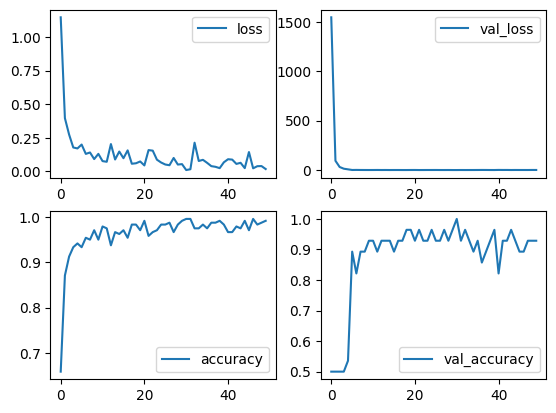

24/24 [==============================] - 2s 83ms/step - loss: 0.0176 - accuracy: 0.9917 - val_loss: 0.7086 - val_accuracy: 0.9286


In [121]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
CNN_Model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])
CNN_Model.fit(trainAug1, epochs=50, callbacks=[plot_params], validation_data=validation_DS)

# **3-3 Training (2)**

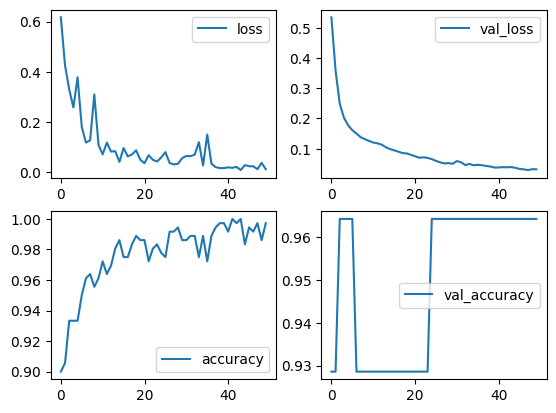

36/36 [==============================] - 3s 82ms/step - loss: 0.0123 - accuracy: 0.9972 - val_loss: 0.0320 - val_accuracy: 0.9643


In [122]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_Model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])
CNN_Model.fit(trainAug2, epochs=50, callbacks=[plot_params], validation_data=validation_DS)

# **3-3 Training (3)**

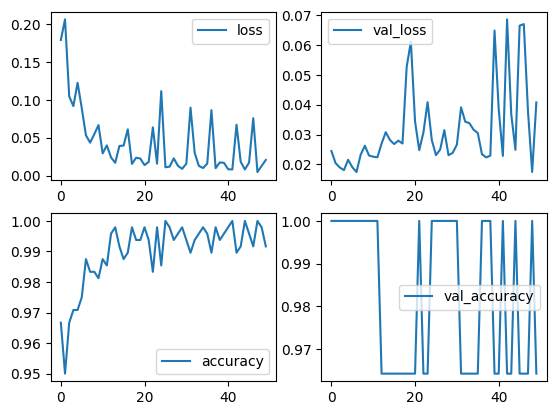

48/48 [==============================] - 3s 63ms/step - loss: 0.0208 - accuracy: 0.9917 - val_loss: 0.0408 - val_accuracy: 0.9643


In [123]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_Model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])
CNN_Model.fit(trainAug3, epochs=50, callbacks=[plot_params], validation_data=validation_DS)

# **3-3 Training (4)**

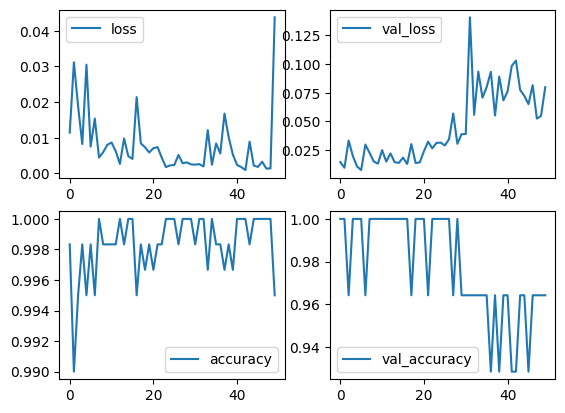

60/60 [==============================] - 3s 45ms/step - loss: 0.0438 - accuracy: 0.9950 - val_loss: 0.0798 - val_accuracy: 0.9643


In [124]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_Model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])
CNN_Model.fit(trainAug4, epochs=50, callbacks=[plot_params], validation_data=validation_DS)

# **3-4 Evaluation**

In [125]:
test_DS.reset()
CNN_Model.evaluate(test_DS)
test_DS.reset()
y_pred = CNN_Model.predict(test_DS)

1/1 [==============================] - 1s 740ms/step - loss: 0.0243 - accuracy: 1.0000


1/1 [==============================] - 1s 818ms/step


In [126]:
y_pred = tf.one_hot(tf.argmax(y_pred, axis=1), depth = 2)

In [127]:
y_ref = test_DS[0][1]

In [128]:
y_pred_enc = np.argmax(y_pred, axis=1)
y_ref_enc = np.argmax(y_ref, axis=1)

In [129]:
print(classification_report(y_ref, y_pred))
def recall_m(y_ref, y_pred):
    true_positives = K.sum(K.round(K.clip(y_ref * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_ref, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_ref, y_pred):
    true_positives = K.sum(K.round(K.clip(y_ref * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_ref, y_pred):
    precision = precision_m(y_ref, y_pred)
    recall = recall_m(y_ref, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

print("f1_score                 :", f1_score(y_ref, y_pred, average='micro'))
print("precision                :", precision_score(y_ref, y_pred, average='micro'))
print("accuracy                 :", accuracy_score(y_ref, y_pred))
 # sensivity recal 1  # specificity recal 0
print("specificity (0 recall)   :", (recall_score(y_ref, y_pred, average=None))[0])
print("sensivity (1 recall)     :", (recall_score(y_ref, y_pred, average=None))[0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
 samples avg       1.00      1.00      1.00        40

f1_score                 : 1.0
precision                : 1.0
accuracy                 : 1.0
specificity (0 recall)   : 1.0
sensivity (1 recall)     : 1.0


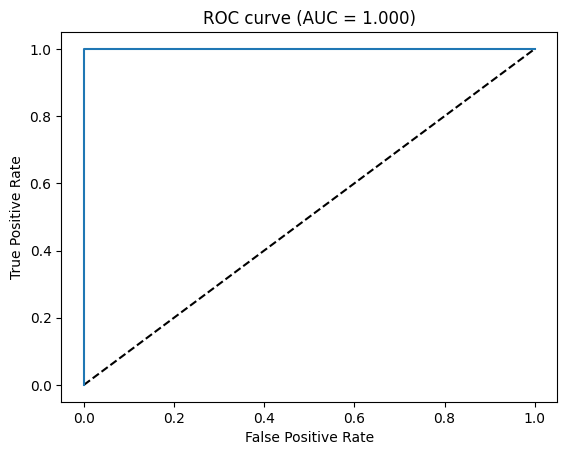

In [130]:
y_pred0 = tf.argmax(y_pred, axis=1)
y_ref0 = tf.argmax(y_ref, axis=1)


# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_ref0, y_pred0)

# Calculate the Area Under the Curve (AUC)
area_under_curve = auc(fpr, tpr)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.plot(fpr, tpr)  # Plot the actual ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (AUC = {:.3f})'.format(area_under_curve))
plt.show()

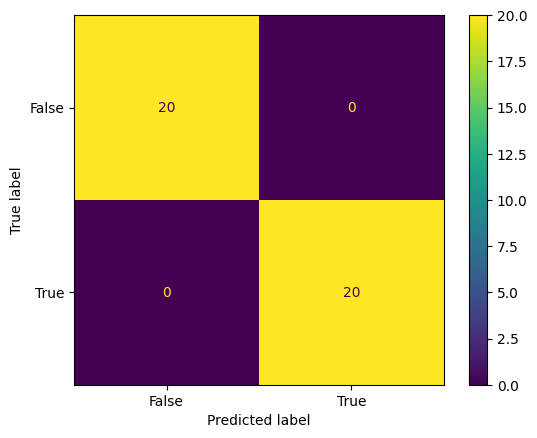

In [131]:
confusion_matrix = metrics.confusion_matrix(y_ref0, y_pred0)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()